In [1]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr


## load data

In [2]:
inflation_raw=pd.read_csv('/Users/qq/Desktop/y2/visualization/proj/inflation_data.csv')
gdp_raw=pd.read_csv('/Users/qq/Desktop/y2/visualization/proj/gdp_data.csv')
b_rate_raw=pd.read_csv('/Users/qq/Desktop/y2/visualization/proj/econ_birthrate_data.csv')

In [4]:
# set up a big table
econ_data=pd.DataFrame()
econ_data['year']=b_rate_raw['Year']
econ_data['CHN_brate']=b_rate_raw['China']
econ_data['CHN_gdp']=gdp_raw['China']
econ_data['CHN_inflation']=inflation_raw['China']

econ_data['US_brate']=b_rate_raw['United States']
econ_data['US_gdp']=gdp_raw['United States']
econ_data['US_inflation']=inflation_raw['United States']

econ_data['IND_brate']=b_rate_raw['India']
econ_data['IND_gdp']=gdp_raw['India']
econ_data['IND_inflation']=inflation_raw['India']

econ_data=econ_data[econ_data['year']<=2017]

In [5]:
########## function of plotting ##########

def line_bar(x,y,y1):
    # define colors
    colors=[]
    for i in y:
        if i >= 0:
            colors.append( 'green')
        else:
            colors.append( 'red')
            
    # plot bar and line        
    fig = plt.figure()
    ax = fig.gca() 
    ax.bar(x, y, align='center', alpha=0.5,color=colors)    
    ax.plot(x, y1)
    ax.title.set_text('Inflation and Birth Rate')
    plt.show()

## plot the inflation and birth rate in China

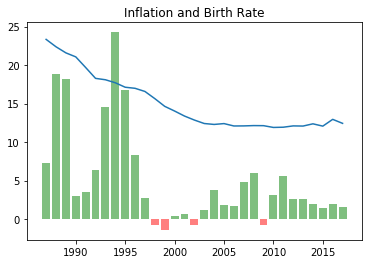

In [7]:
a=econ_data[econ_data['year']>=1987]
a=a[a['year']<=2017]
year_CN=a['year']
y_CN=a['CHN_inflation']  
y1_CN=a['CHN_brate']
line_bar(year_CN,y_CN,y1_CN) 


## plot the inflation and birth rate in US

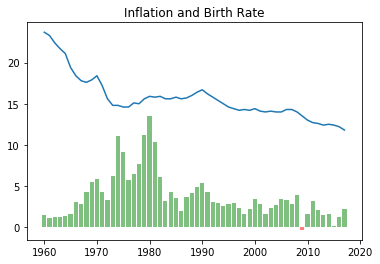

In [8]:
year=econ_data['year']
y_US=econ_data['US_inflation']  
y1_US=econ_data['US_brate']
line_bar(year,y_US,y1_US)


## plot the inflation and birth rate in India

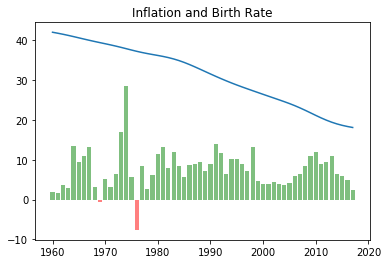

In [9]:
year=econ_data['year']
y_IN=econ_data['IND_inflation']  
y1_IN=econ_data['IND_brate']
line_bar(year,y_IN,y1_IN)

## correlation

In [10]:
corr_CN,_=pearsonr(y_CN, y1_CN)
corr_US,_=pearsonr(y_US, y1_US)
corr_IN,_=pearsonr(y_IN, y1_IN)
print('Pearsons correlation of inflation and birth rate: %.3f' % corr_CN)
print('Pearsons correlation of inflation and birth rate: %.3f' % corr_US)
print('Pearsons correlation of inflation and birth rate: %.3f' % corr_IN)


Pearsons correlation of inflation and birth rate: 0.600
Pearsons correlation of inflation and birth rate: -0.035
Pearsons correlation of inflation and birth rate: 0.010


Correlations between inflation and birth rate are quite different in these 3 countries. We could not get representative conclusion from this.

In [11]:
gdp_CN=a['CHN_gdp']  
br_CN=a['CHN_brate']
    
gdp_US=econ_data['US_gdp']  
br_US=econ_data['US_brate']
    
gdp_IN=econ_data['IND_gdp']  
br_IN=econ_data['IND_brate']
    
corr_CN_gdp,_=pearsonr(gdp_CN, br_CN)
corr_US_gdp,_=pearsonr(gdp_US, br_US)
corr_IN_gdp,_=pearsonr(gdp_IN, br_IN)
print('Pearsons correlation of gdp and birth rate: %.3f' % corr_CN_gdp)
print('Pearsons correlation of gdp and birth rate: %.3f' % corr_US_gdp)
print('Pearsons correlation of gdp and birth rate: %.3f' % corr_IN_gdp)

Pearsons correlation of gdp and birth rate: -0.622
Pearsons correlation of gdp and birth rate: -0.747
Pearsons correlation of gdp and birth rate: -0.874


All these 3 countries show storng negative correlations between gdp adn birth rates, indicating that as gdp increases, birth rate declines.